In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from pathlib import Path
import albumentations as A
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model,load_model

In [2]:
dll_directory = r'C:\Users\bkj\Downloads\openslide-win64-20231011\bin'
os.add_dll_directory(dll_directory)
import openslide


In [3]:
import openslide

# Replace 'path/to/your/image.svs' with the actual path to your .svs file
slide_path = 'svs_file/DI-MH-226-07.svs'
slide = openslide.open_slide(slide_path)

# Get basic information about the slide
slide_info = {
    'level_count': slide.level_count,
    'level_dimensions': [slide.level_dimensions[i] for i in range(slide.level_count)],
    'level_downsamples': [slide.level_downsamples[i] for i in range(slide.level_count)],
}


In [ ]:
def extract_patches(slide, level=0, patch_size=(256, 256), stride=(128, 128)):
    width, height = slide.level_dimensions[level]
    stride_x, stride_y = stride
    patch_x, patch_y = patch_size

    patches = []
    for y in range(0, height - patch_y, stride_y):
        for x in range(0, width - patch_x, stride_x):
            region = slide.read_region((x, y), level, patch_size)
            patch = np.array(region.convert('RGB'))
            patches.append(patch)

    return np.array(patches)

# Example usage
patches = extract_patches(slide, level=0, patch_size=(256, 256), stride=(128, 128))

In [7]:
def patch_generator(slide, level=1, patch_size=(256, 256), stride=(128, 128)):
    width, height = slide.level_dimensions[level]
    for y in range(0, height - patch_size[1], stride[1]):
        for x in range(0, width - patch_size[0], stride[0]):
            region = slide.read_region((x, y), level, patch_size)
            patch = np.array(region.convert('RGB'))
            yield patch

patch_size = (128, 128)
stride = (64, 64)
patch_gen = patch_generator(slide, level=0, patch_size=patch_size, stride=stride)


In [8]:
x = next(patch_gen)
x

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]]

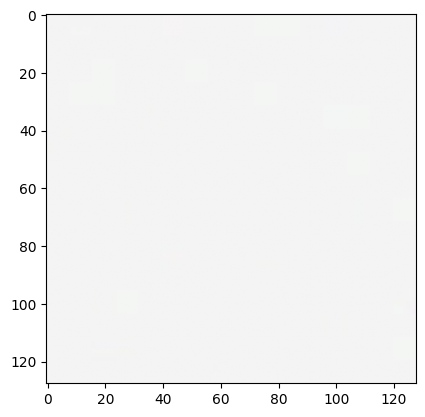

In [9]:
plt.imshow(x/255.0)